# 1.1

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import gamma
from sklearn.linear_model import LinearRegression

np.random.seed(42)
N = 10000

In [45]:
# normal
X_normal = np.random.normal(loc=1, scale=1, size=N)

# weibull
alpha_w = 0.3
# the mean of weibull is gamma(1 + 1/alpha) => need to normalize with below
norm_weibull = 1 / gamma(1 + 1/alpha_w) 
X_weibull = norm_weibull * np.random.weibull(alpha_w, size=N)

# pareto
alpha_p = 0.5
x_L = 1/3
X_pareto = stats.pareto.rvs(b=alpha_p, scale=x_L, size=N)

print(f"Normal: mean={np.mean(X_normal):.4f}")
print(f"Weibull: mean={np.mean(X_weibull):.4f}")
print(f"Pareto: mean={np.mean(X_pareto):.4f}")
print(f"Normal: median={X_normal[N // 2]:.4f}")
print(f"Weibull: median={X_weibull[N//2]:.4f}")
print(f"Pareto: median={X_pareto[N//2]:.4f}")

Normal: mean=0.9979
Weibull: mean=1.0864
Pareto: mean=2210.8049
Normal: median=0.5762
Weibull: median=0.0365
Pareto: median=0.5318


## 1.1 a

In [46]:
S_normal = np.cumsum(X_normal)
S_weibull = np.cumsum(X_weibull)
S_pareto = np.cumsum(X_pareto)
n_values = np.arange(1, N + 1)

/var/folders/p9/32fc1v0j6599vvjykr2h58400000gn/T/ipykernel_80118/1722901967.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].set_title("Normal (n=20)"); axes[0].legend(); axes[0].grid(True, alpha=0.3)
/var/folders/p9/32fc1v0j6599vvjykr2h58400000gn/T/ipykernel_80118/1722901967.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


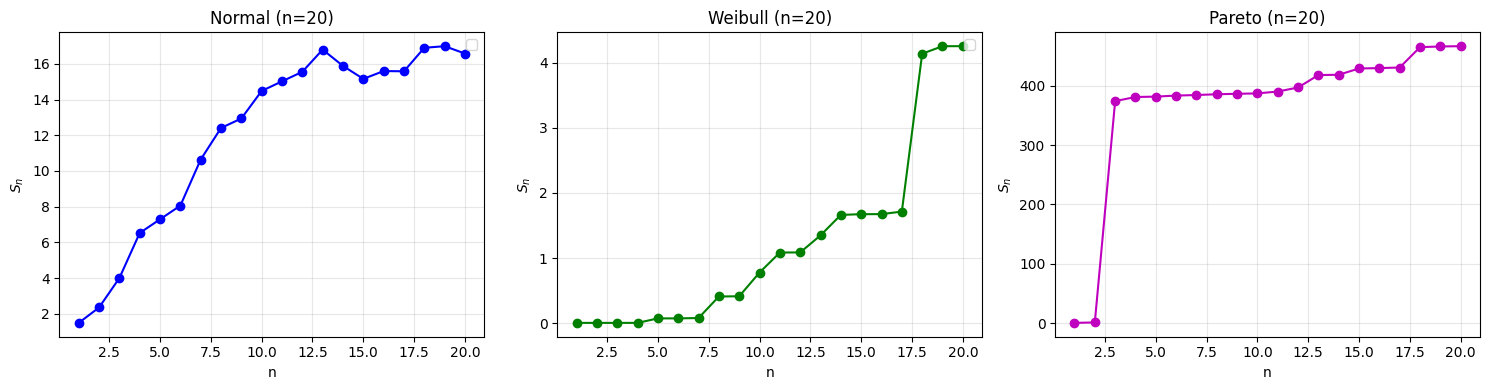

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
n = 20

axes[0].plot(n_values[:n], S_normal[:n], "b-o")
axes[0].set_xlabel("n"); axes[0].set_ylabel("$S_n$")
axes[0].set_title("Normal (n=20)"); axes[0].legend(); axes[0].grid(True, alpha=0.3)

axes[1].plot(n_values[:n], S_weibull[:n], "g-o")
axes[1].set_xlabel("n")
axes[1].set_ylabel("$S_n$")
axes[1].set_title("Weibull (n=20)")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

axes[2].plot(n_values[:n], S_pareto[:n], "m-o")
axes[2].set_xlabel("n")
axes[2].set_ylabel("$S_n$")
axes[2].set_title("Pareto (n=20)")
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

/var/folders/p9/32fc1v0j6599vvjykr2h58400000gn/T/ipykernel_80118/1336197453.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].set_title("Normal (Full Range)"); axes[0].legend(); axes[0].grid(True, alpha=0.3)
/var/folders/p9/32fc1v0j6599vvjykr2h58400000gn/T/ipykernel_80118/1336197453.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].set_title("Weibull (Full Range)"); axes[1].legend(); axes[1].grid(True, alpha=0.3)


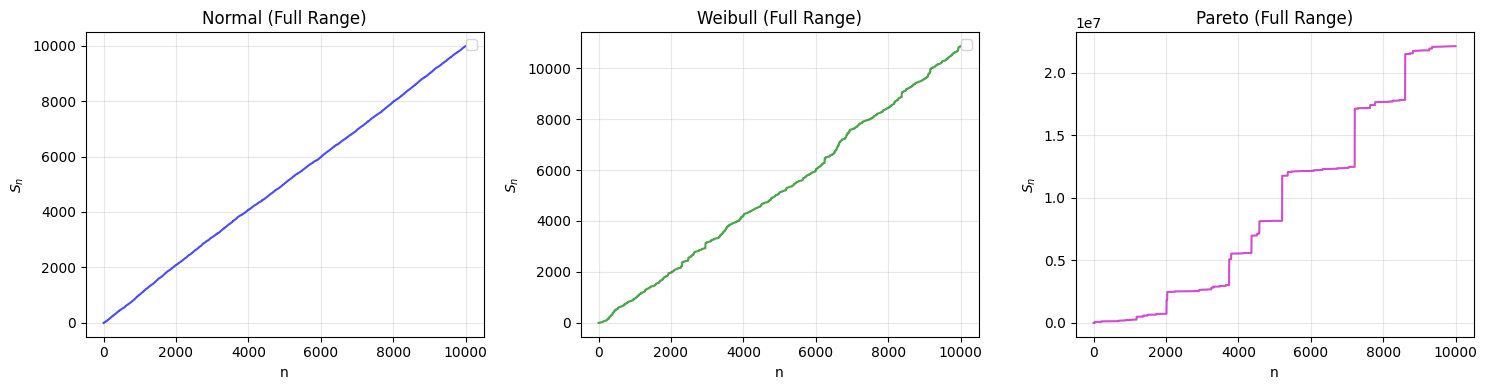

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].plot(n_values, S_normal, "b-", alpha=0.7)
axes[0].set_xlabel("n"); axes[0].set_ylabel("$S_n$")
axes[0].set_title("Normal (Full Range)"); axes[0].legend(); axes[0].grid(True, alpha=0.3)

axes[1].plot(n_values, S_weibull, "g-", alpha=0.7)
axes[1].set_xlabel("n"); axes[1].set_ylabel("$S_n$")
axes[1].set_title("Weibull (Full Range)"); axes[1].legend(); axes[1].grid(True, alpha=0.3)

axes[2].plot(n_values, S_pareto, "m-", alpha=0.7)
axes[2].set_xlabel("n"); axes[2].set_ylabel("$S_n$")
axes[2].set_title("Pareto (Full Range)"); axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 1.1 b.

In [49]:
E_normal = 1
E_weibull = 1
E_pareto = np.mean(X_pareto) # probably biased?
devs_normal = (S_normal - n_values * E_normal) / np.sqrt(n_values)
devs_weibull = (S_weibull - n_values * E_weibull) / np.sqrt(n_values)
devs_pareto = (S_pareto - n_values * E_pareto) / np.sqrt(n_values)

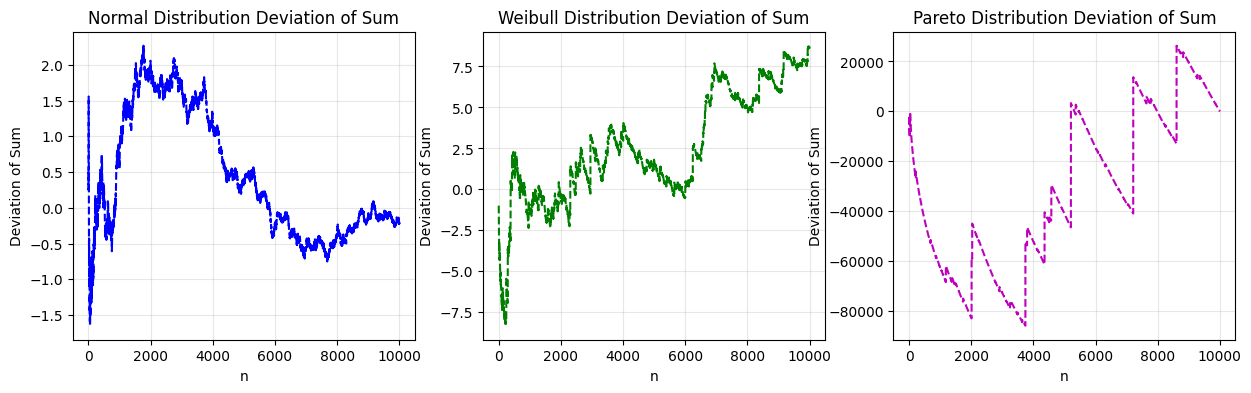

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].plot(n_values, devs_normal, 'b--')
axes[0].set_title("Normal Distribution Deviation of Sum")
axes[0].grid(True, alpha=0.3)
axes[0].set_xlabel("n")
axes[0].set_ylabel("Deviation of Sum")
axes[1].plot(n_values, devs_weibull, 'g--')
axes[1].set_title("Weibull Distribution Deviation of Sum")
axes[1].grid(True, alpha=0.3)
axes[1].set_xlabel("n")
axes[1].set_ylabel("Deviation of Sum")
axes[2].plot(n_values, devs_pareto, 'm--')
axes[2].set_title("Pareto Distribution Deviation of Sum")
axes[2].grid(True, alpha=0.3)
axes[2].set_xlabel("n")
axes[2].set_ylabel("Deviation of Sum")
plt.show()

## 1.1 c.

In [51]:
def income_fraction(X, r):
    X_sorted = np.sort(X)[::-1]
    top_n = int(np.ceil(len(X) * r / 100))
    return np.sum(X_sorted[:top_n]) / np.sum(X)

r_values = np.arange(1, 21)
f_weibull = [income_fraction(X_weibull, r) for r in r_values]
f_pareto = [income_fraction(X_pareto, r) for r in r_values]

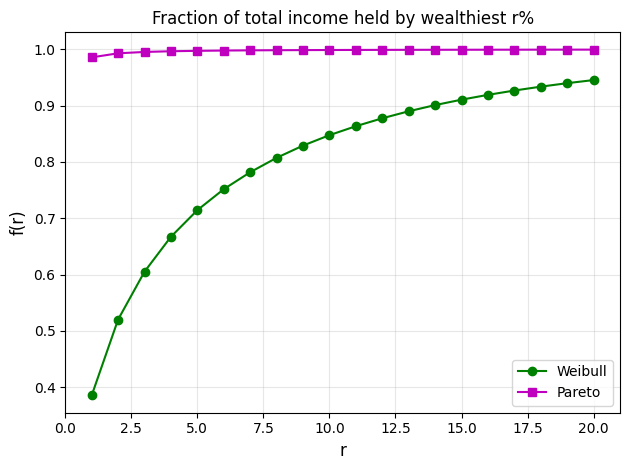

In [52]:
plt.plot(r_values, f_weibull, "g-o", label="Weibull")
plt.plot(r_values, f_pareto, "m-s", label="Pareto")

plt.xlabel("r", fontsize=12)
plt.ylabel("f(r)", fontsize=12)
plt.title("Fraction of total income held by wealthiest r%")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([0, 21])
plt.tight_layout()
plt.show()

## 1.1 d.

In [ ]:
def filter_positive(X):
    return X[X > 0]

def filter_outliers(X):
    # q1 = np.percentile(X, 25)
    # q3 = np.percentile(X, 75)
    # iqr = q3 - q1
    # lowerbound = q1 - 1.5 * iqr
    # upperbound = q3 + 1.5 * iqr
    # return X[(X >= lowerbound) & (X <= upperbound)]

    lowerbound = np.percentile(X, 0.001)
    upperbound = np.percentile(X, 99.999)
    return X[(X >= lowerbound) & (X <= upperbound)]

def filter_pos_and_outliers(X):
    return filter_positive(filter_outliers(X))
    # return filter_outliers(filter_positive(X))

def freq_plot_data(X, num_bins=500):
    X_pos = X[X > 0]
    bins = np.logspace(np.log10(X_pos.min()), np.log10(X_pos.max()), num_bins)
    # used cursor to code this
    # but basically np histogram returns the counts and edges
    # edges is the ticks for the histogram, so by taking geo avg, we get the midpoints
    # so that we can perform linreg on the histogram points.
    counts, edges = np.histogram(X_pos, bins=bins)
    centers = np.sqrt(edges[:-1] * edges[1:])
    mask = counts > 0
    return centers[mask], counts[mask]

def rank_plot_data(X):
    X_pos = X[X > 0]
    X_sorted = np.sort(X_pos)
    n = len(X_sorted)
    ccdf = (n - np.arange(1, n+1) + 1) / n
    return X_sorted, ccdf

plotting code is cursor generated

In [58]:
dists = {"Normal": filter_pos_and_outliers(X_normal), "Weibull": filter_pos_and_outliers(X_weibull), "Pareto": filter_pos_and_outliers(X_pareto)}
colors = {"Normal": "blue", "Weibull": "green", "Pareto": "purple"}

/var/folders/p9/32fc1v0j6599vvjykr2h58400000gn/T/ipykernel_80118/1393125502.py:9: RuntimeWarning: divide by zero encountered in log10
  log_y = np.log10(counts)


ValueError: Input y contains infinity or a value too large for dtype('float64').

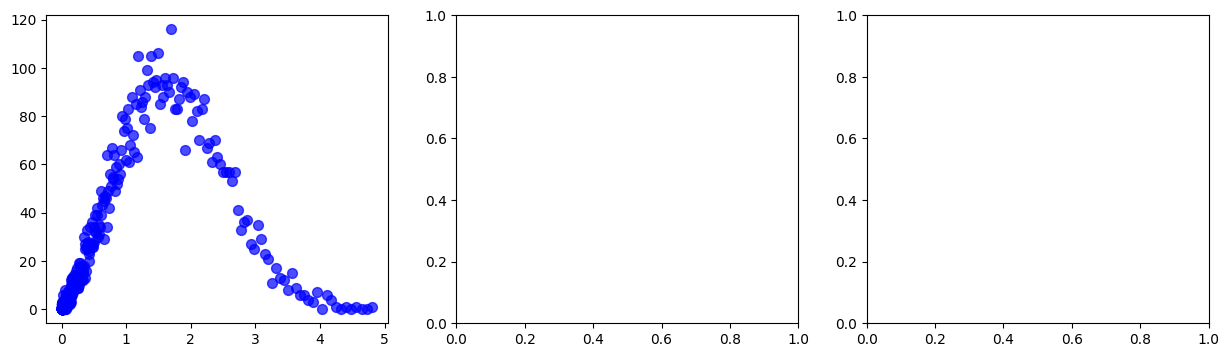

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (name, X) in enumerate(dists.items()):
    centers, counts = freq_plot_data(X)
    axes[idx].scatter(centers, counts, c=colors[name], alpha=0.7, s=50)
    
    # Linear regression on log-log
    log_x = np.log10(centers).reshape(-1, 1)
    log_y = np.log10(counts)
    reg = LinearRegression().fit(log_x, log_y)
    slope = reg.coef_[0]
    r2 = reg.score(log_x, log_y)
    
    x_fit = np.logspace(np.log10(centers.min()), np.log10(centers.max()), 100)
    y_fit = 10**(reg.predict(np.log10(x_fit).reshape(-1, 1)))
    axes[idx].plot(x_fit, y_fit, "r--", lw=2, label=f"Slope: {slope:.2f}, R²: {r2:.3f}")
    
    axes[idx].set_xscale("log"); axes[idx].set_yscale("log")
    axes[idx].set_xlabel("Value"); axes[idx].set_ylabel("Frequency")
    axes[idx].set_title(f"{name} - Frequency Plot")
    axes[idx].legend(); axes[idx].grid(True, alpha=0.3, which="both")

plt.tight_layout()
plt.show()

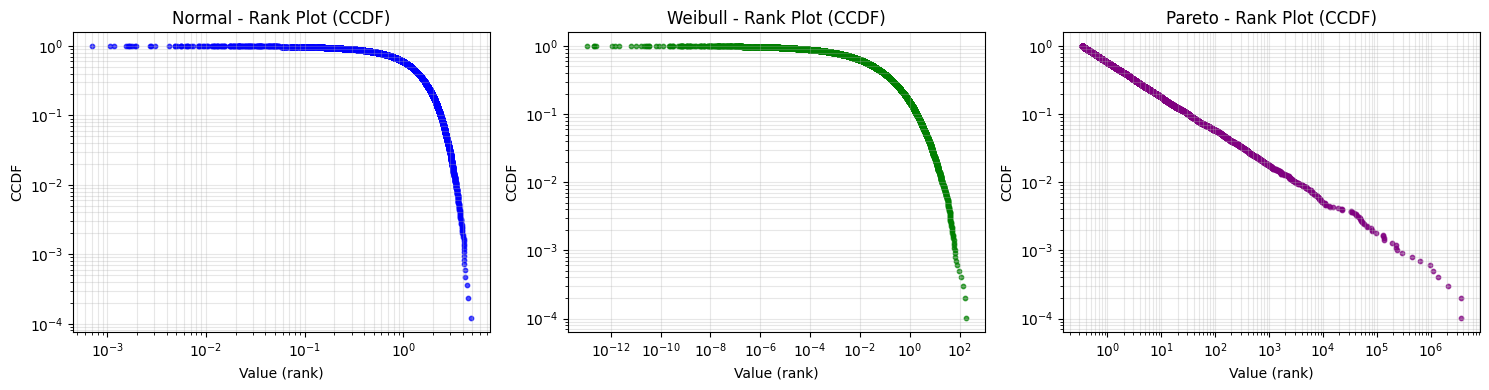

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for idx, (name, X) in enumerate(dists.items()):
    x_vals, ccdf = rank_plot_data(X)
    axes[idx].scatter(x_vals, ccdf, c=colors[name], alpha=0.7, s=10)
    axes[idx].set_xscale("log")
    axes[idx].set_yscale("log")
    axes[idx].set_xlabel("Value (rank)")
    axes[idx].set_ylabel("CCDF")
    axes[idx].set_title(f"{name} - Rank Plot (CCDF)")
    axes[idx].grid(True, alpha=0.3, which="both")
plt.tight_layout()
plt.show()